In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
artists = pd.read_json("v2/artists.jsonl", lines=True)

In [5]:
artists

,id,name,genres
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica..."
2,3OKg7YbOIatODzkRIbLJR4,TheFatRat,[speedrun]
3,4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]"
4,56mfhUDKa1vec6rSLZV5Eg,Jawsh 685,[nz pop]
...,...,...,...
1662,6AMd49uBDJfhf30Ak2QR5s,Coi Leray,"[pop r&b, r&b, trap queen, viral rap]"
1663,6qgnBH6iDM91ipVXv28OMu,KAYTRANADA,"[escape room, indie soul, lgbtq+ hip hop]"
1664,5q8HGNo0BjLWaTAhRtbwxa,Brantley Gilbert,"[contemporary country, country, country road, ..."
1665,26T4yOaOoFJvUvxR87Y9HO,Bethel Music,"[ambient worship, ccm, christian music, deep c..."


In [6]:
unique_genres = set()

In [7]:
gen = artists["genres"]

In [8]:
for i in gen:
    for x in i:
        unique_genres.add(x)

In [9]:
print(len(unique_genres))

846


In [10]:
unique_genres

{'a cappella',
 'acid rock',
 'acoustic pop',
 'adult standards',
 'afro dancehall',
 'afrofuturism',
 'afrofuturismo brasileiro',
 'afropop',
 'afroswing',
 'alabama rap',
 'albanian hip hop',
 'album rock',
 'alt z',
 'alternative dance',
 'alternative hip hop',
 'alternative metal',
 'alternative pop rock',
 'alternative r&b',
 'alternative rock',
 'ambient folk',
 'ambient pop',
 'ambient worship',
 'anime',
 'anime latino',
 'anime rock',
 'anime score',
 'anti-folk',
 'argentine hip hop',
 'argentine indie',
 'argentine reggae',
 'argentine rock',
 'argentine telepop',
 'arkansas country',
 'art pop',
 'art punk',
 'art rock',
 'asian american hip hop',
 'asmr',
 'athens indie',
 'atl hip hop',
 'atl trap',
 'aussie drill',
 'austindie',
 'australian alternative pop',
 "australian children's music",
 'australian country',
 'australian dance',
 'australian electropop',
 'australian hip hop',
 'australian indie',
 'australian pop',
 'australian psych',
 'australian reggae fusion',


In [16]:
artists

,name,genres
0,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica..."
2,TheFatRat,[speedrun]
3,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]"
4,Jawsh 685,[nz pop]
...,...,...
1662,Coi Leray,"[pop r&b, r&b, trap queen, viral rap]"
1663,KAYTRANADA,"[escape room, indie soul, lgbtq+ hip hop]"
1664,Brantley Gilbert,"[contemporary country, country, country road, ..."
1665,Bethel Music,"[ambient worship, ccm, christian music, deep c..."


In [15]:
artists = artists.drop("id", axis=1)

In [17]:
artists_corr = artists.corr()

ValueError: could not convert string to float: 'Lil Nas X'

In [32]:
artists_corr = artists.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(artists_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

NameError: name 'plt' is not defined

# Sessions

In [7]:
sessions = pd.read_json("v2/sessions.jsonl",lines=True)

In [8]:
sessions

,session_id,timestamp,user_id,track_id,event_type
0,124,2024-07-13 15:55:37.000,101,4YPgTCGJWAlHQ5g6eWoM8r,play
1,125,2024-06-20 06:31:23.547,101,4p8QcNkaq2FQj8uGJ7HEDK,play
2,125,2024-06-20 06:35:43.814,101,4GKk1uNzpxIptBuaY97Dkj,play
3,125,2024-06-20 06:39:13.270,101,4GKk1uNzpxIptBuaY97Dkj,like
4,125,2024-06-20 06:40:43.481,101,0ZO2iSS12JTftv10cSCYf8,play
...,...,...,...,...,...
26342,4755,2024-08-11 13:40:51.342,150,4COFVKhvXA3LecFReH6D2v,play
26343,4755,2024-08-11 13:42:19.523,150,4COFVKhvXA3LecFReH6D2v,like
26344,4755,2024-08-11 13:44:50.582,150,6vPAmoERUMRoTZaCCSWQ12,play
26345,4755,2024-08-11 13:49:36.582,150,5A32KQZznC2HSqr9qzTl2N,play


In [12]:
missing_trackid = sessions[sessions["track_id"].isnull()]

In [13]:
missing_trackid

,session_id,timestamp,user_id,track_id,event_type
5,125,2024-06-20 06:44:27.159,101,None,advertisment
7,125,2024-06-20 06:47:56.399,101,None,advertisment
15,125,2024-06-20 06:55:27.582,101,None,advertisment
20,125,2024-06-20 06:57:05.442,101,None,advertisment
22,125,2024-06-20 07:00:02.010,101,None,advertisment
...,...,...,...,...,...
26304,4748,2024-05-20 12:16:53.330,150,None,advertisment
26315,4751,2024-06-13 12:07:59.820,150,None,advertisment
26323,4752,2024-11-14 23:15:38.030,150,None,advertisment
26330,4753,2024-03-31 08:03:57.863,150,None,advertisment


# tracks


In [45]:
tracks = pd.read_json("v2/tracks.jsonl", lines=True)

In [30]:
tracks = tracks.drop([ "release_date"], axis=1)

In [46]:
tracks

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.5860,0.000000,0.3320,0.7130,88.973
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.9470,0.000009,0.3210,0.1340,91.783
2,4Pnzw1nLOpDNV6MKI5ueIR,Nancy (With the Laughing Face) - 78rpm Version,55,199000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.295,0.0826,1,-19.569,0.0367,0.9840,0.000358,0.1560,0.1690,128.600
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,54,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.8400,0.000002,0.7880,0.5900,126.974
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),53,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.9500,0.276000,0.1520,0.1000,90.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,0LcNMuOiULmxJK3bdHTfDF,Missing You,65,214987,0,7gAppWoH7pcYmphCVTXkzs,2019-04-19,0.537,0.6470,2,-7.370,0.0519,0.1680,0.000000,0.1080,0.5310,79.770
22408,1uviKYHZuM4uINK33F7sCt,Fix It to Break It,70,198799,0,7okSU80WTrn4LXlyXYbX3P,2020-03-27,0.493,0.4610,2,-8.524,0.0456,0.8450,0.000000,0.1150,0.3500,51.414
22409,1fXmDeiCb3ABt5CzkMxp4u,Lotus Inn,63,195868,0,2jnIB6XdLvnJUeNTy5A0J2,2020-12-04,0.578,0.7400,2,-5.080,0.0721,0.0119,0.000000,0.1800,0.4950,155.984
22410,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,67,202355,0,7okSU80WTrn4LXlyXYbX3P,2020-11-27,0.590,0.4430,0,-5.662,0.0722,0.6180,0.000000,0.1100,0.3420,149.447


In [27]:
def convert_to_datetime(date_str):
    try:
        if len(date_str) == 4:  # Only year
            return pd.to_datetime(date_str + '-01-01')
        elif len(date_str) == 7:  # Year and month
            return pd.to_datetime(date_str + '-01')
        else:  # Full date
            return pd.to_datetime(date_str)
    except Exception as e:
        return pd.NaT

# Apply the function to the release_date column
tracks['release_date'] = tracks['release_date'].apply(convert_to_datetime)

# Convert the datetime to a timestamp (as a number)
tracks['release_date_timestamp'] = tracks['release_date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

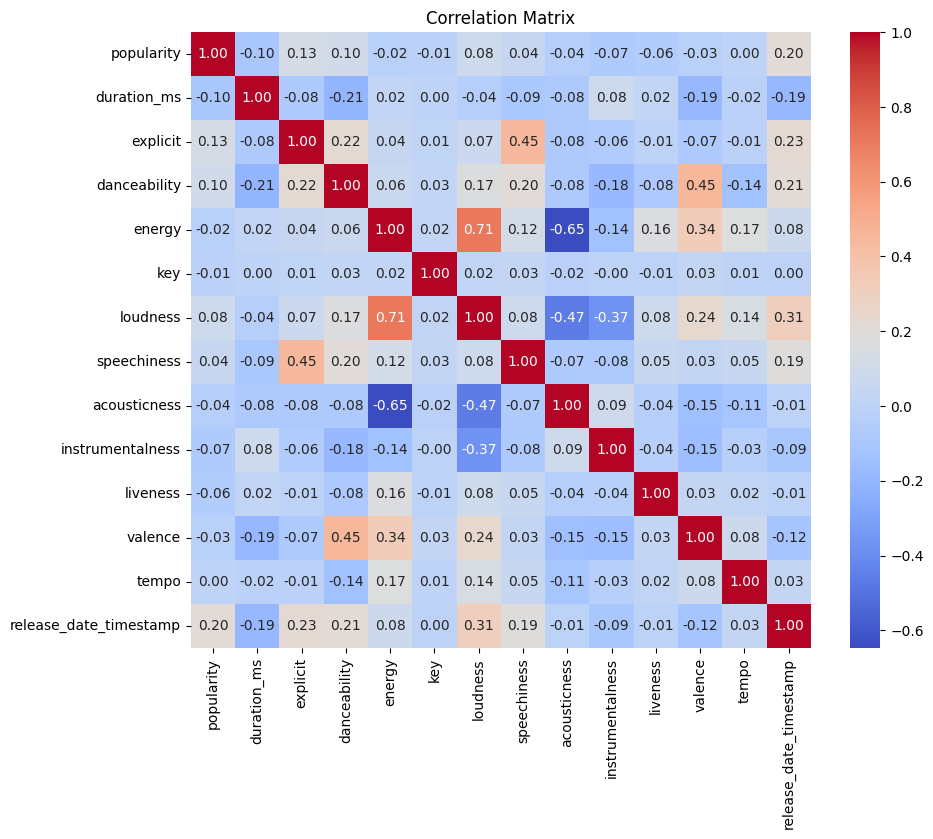

In [36]:
tracks_corr = tracks.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(tracks_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
# plt.show()
plt.savefig("corr.png")

In [ ]:
When this index is below 33, the music tends to be predominantly instrumental, while values above 66 suggest a higher presence of lyrics, implying significant lyrical richness. 

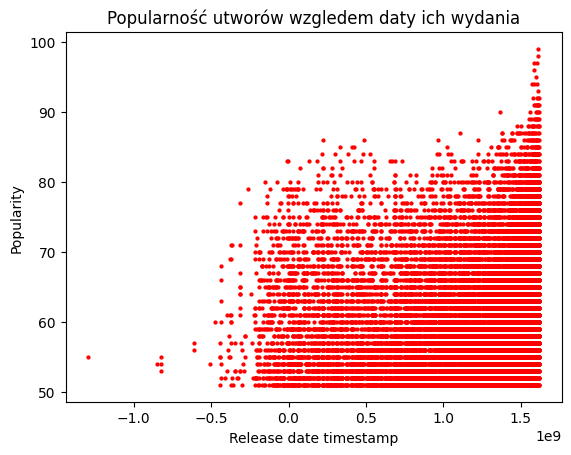

In [42]:
plt.scatter(tracks["release_date_timestamp"], tracks["popularity"], s=4.20, color='red')
plt.title("Popularność utworów wzgledem daty ich wydania")
plt.xlabel("Release date timestamp")
plt.ylabel("Popularity")
plt.savefig("popularity.png")

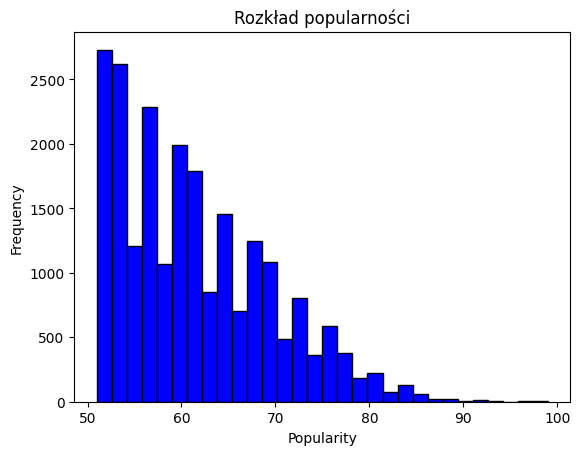

In [44]:
plt.hist(tracks['popularity'], bins=30, color='blue', edgecolor='black')
plt.title("Rozkład popularności")
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.savefig('popularity_distribution.png')
plt.show()